   Season         Driver  Races  AvgQuali  AvgFinish  Podiums  Wins  \
0    2024   Lando Norris     24  3.541667   4.291667       13     4   
1    2024  Oscar Piastri     24  5.416667   5.125000        8     2   
2    2025   Lando Norris     24  2.958333   4.250000       18     7   
3    2025  Oscar Piastri     24  3.041667   4.208333       16     7   

   AvgRaceLap  
0   92.549292  
1   92.908244  
2   91.066167  
3   90.474986  


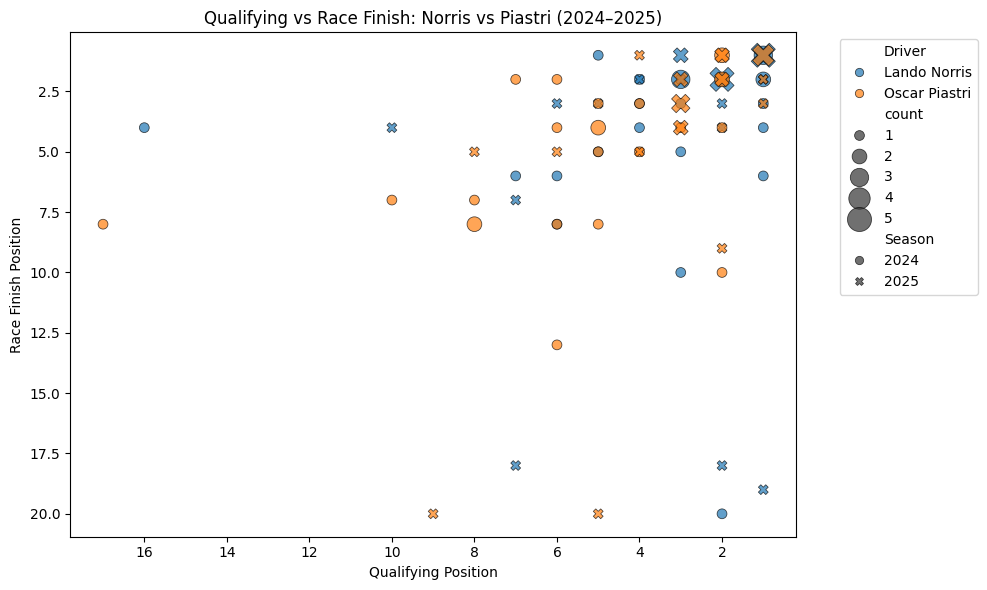


**Graph 1: Qualifying vs Race Finish**  
This scatter plot shows the relationship between qualifying position (x-axis) and race finish (y-axis) for Lando Norris and Oscar Piastri in 2024–2025.  
- Lower x = better qualifying  
- Lower y = better race finish  
- Point size indicates how many times that combination occurred


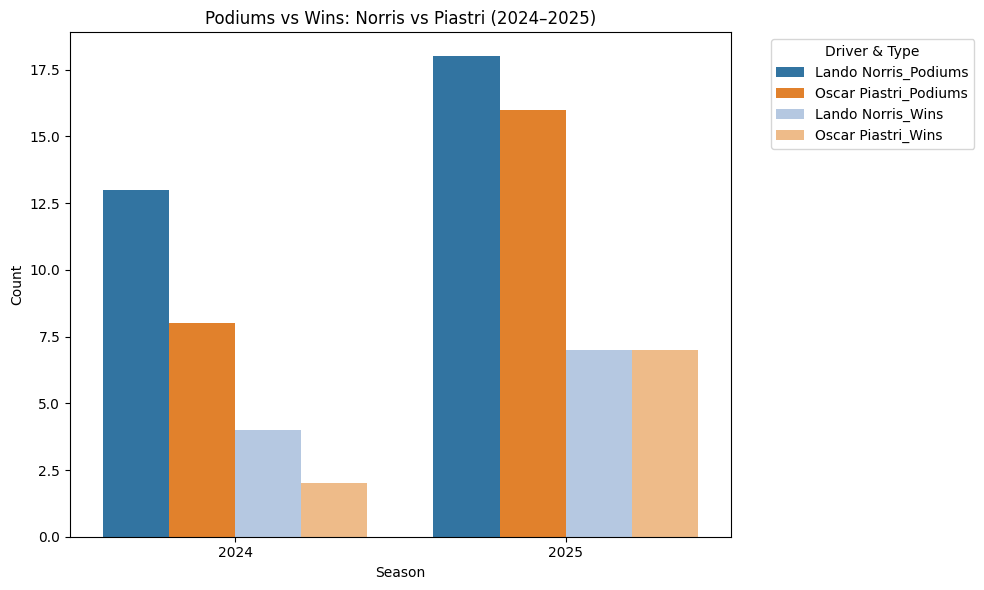


**Graph 2: Podiums vs Wins**  
Grouped bar chart showing total podiums and wins per season for each driver.  
- Darker color = Podiums  
- Lighter color = Wins  
- Helps compare who converted podiums into wins


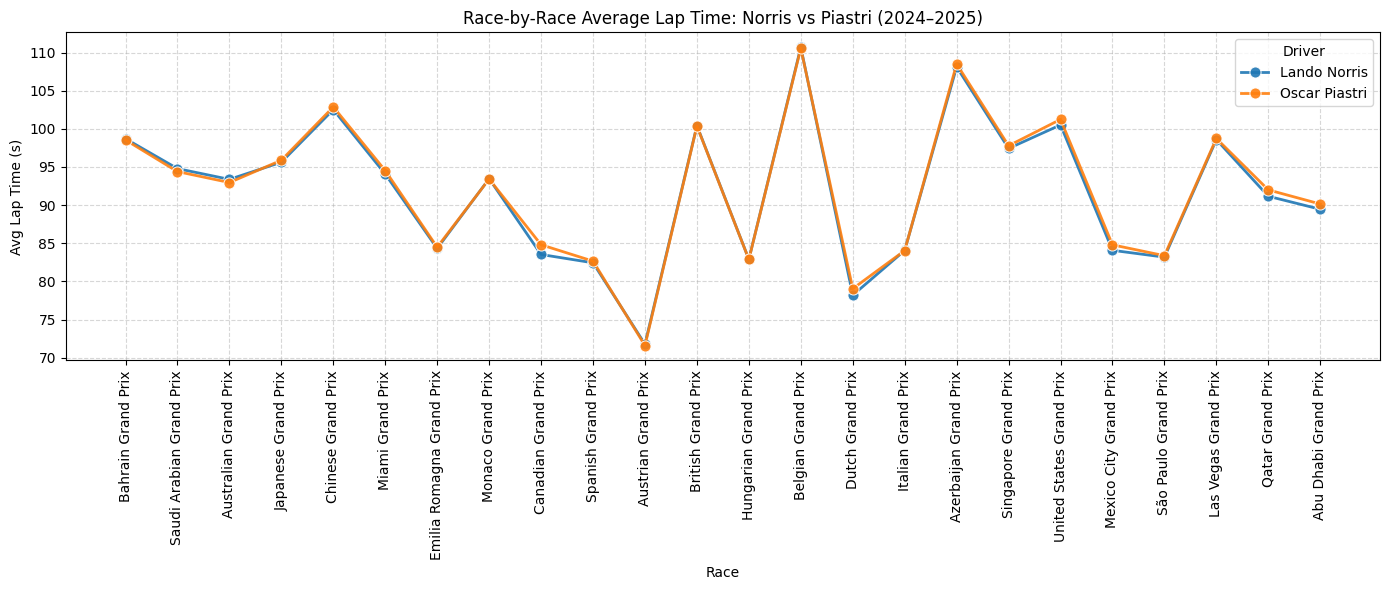


**Graph 3: Race-by-Race Average Lap Time**  
Line plot showing average lap time per race.  
- Each line = a driver  
- Helps visualize who had better pace in each race  
- Marker shows each race lap time point


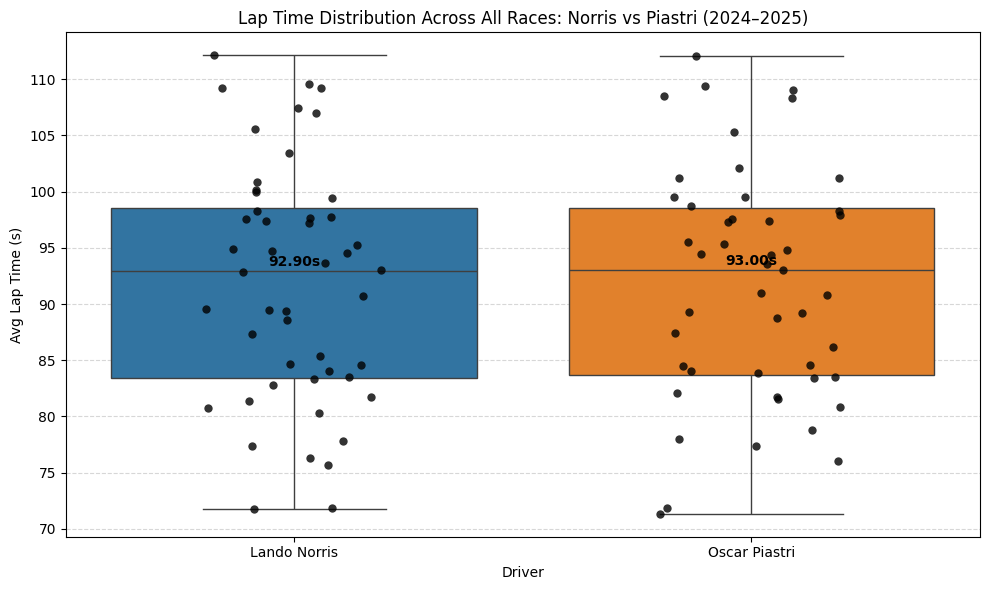


**Graph 4: Lap Time Distribution**  
Boxplot showing distribution of lap times for all races.  
- Box = interquartile range  
- Line inside box = median  
- Points = individual race lap times  
- Helps visualize consistency and outliers for each driver


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

# Load and preprocess data
df = pd.read_csv("lando_oscar_race_data_2024_2025.csv")
df["QualiPos"] = pd.to_numeric(df["QualiPos"], errors="coerce")
df["FinishPos"] = pd.to_numeric(df["FinishPos"], errors="coerce")
df["AvgLapTime_s"] = pd.to_numeric(df["AvgLapTime_s"], errors="coerce")  # handle missing lap times

# Summarize per season
summary = df.groupby(["Season", "Driver"]).agg(
    Races=("Race", "count"),
    AvgQuali=("QualiPos", "mean"),
    AvgFinish=("FinishPos", "mean"),
    Podiums=("Podium", "sum"),
    Wins=("Win", "sum"),
    AvgRaceLap=("AvgLapTime_s", "mean")
).reset_index()

summary.to_csv("lando_oscar_summary_2024_2025.csv", index=False)
print(summary)

# --------------------------
# 1. Qualifying vs Race Finish
counts = df.groupby(["QualiPos", "FinishPos", "Driver", "Season"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=counts,
    x="QualiPos",
    y="FinishPos",
    hue="Driver",
    style="Season",
    size="count",
    sizes=(50, 300),
    alpha=0.7,
    edgecolor="black"
)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("Qualifying vs Race Finish: Norris vs Piastri (2024–2025)")
plt.xlabel("Qualifying Position")
plt.ylabel("Race Finish Position")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.savefig("graphs/quali_vs_finish.png")
plt.show()

display(Markdown("""
**Graph 1: Qualifying vs Race Finish**  
This scatter plot shows the relationship between qualifying position (x-axis) and race finish (y-axis) for Lando Norris and Oscar Piastri in 2024–2025.  
- Lower x = better qualifying  
- Lower y = better race finish  
- Point size indicates how many times that combination occurred
"""))

# --------------------------
# 2. Podiums vs Wins Comparison
combined = summary.melt(
    id_vars=["Season", "Driver"],
    value_vars=["Podiums", "Wins"],
    var_name="Type",
    value_name="Count"
)
combined["Driver_Type"] = combined["Driver"] + "_" + combined["Type"]
palette = {
    "Lando Norris_Podiums": "#1f77b4",
    "Lando Norris_Wins": "#aec7e8",
    "Oscar Piastri_Podiums": "#ff7f0e",
    "Oscar Piastri_Wins": "#ffbb78"
}

plt.figure(figsize=(10,6))
sns.barplot(
    data=combined,
    x="Season",
    y="Count",
    hue="Driver_Type",
    dodge=True,
    palette=palette,
    errorbar=None
)
plt.title("Podiums vs Wins: Norris vs Piastri (2024–2025)")
plt.ylabel("Count")
plt.xlabel("Season")
plt.legend(title="Driver & Type", bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.savefig("graphs/podiums_wins_clear.png")
plt.show()

display(Markdown("""
**Graph 2: Podiums vs Wins**  
Grouped bar chart showing total podiums and wins per season for each driver.  
- Darker color = Podiums  
- Lighter color = Wins  
- Helps compare who converted podiums into wins
"""))

# --------------------------
# 3. Race-by-Race Average Lap Time
plt.figure(figsize=(14,6))
sns.lineplot(
    data=df,
    x="Race",
    y="AvgLapTime_s",
    hue="Driver",
    marker="o",
    linewidth=2,
    markersize=8,
    alpha=0.9,
    errorbar=None  
)
plt.xticks(rotation=90)
plt.ylabel("Avg Lap Time (s)")
plt.xlabel("Race")
plt.title("Race-by-Race Average Lap Time: Norris vs Piastri (2024–2025)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Driver")
plt.tight_layout()
plt.savefig("graphs/lap_time_lineplot.png")
plt.show()

display(Markdown("""
**Graph 3: Race-by-Race Average Lap Time**  
Line plot showing average lap time per race.  
- Each line = a driver  
- Helps visualize who had better pace in each race  
- Marker shows each race lap time point
"""))

# --------------------------
# 4. Lap Time Distribution
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="Driver",
    y="AvgLapTime_s",
    hue="Driver",  
    palette={"Lando Norris":"#1f77b4", "Oscar Piastri":"#ff7f0e"},
    showfliers=False,
    dodge=False,  
    legend=False 
)
sns.stripplot(
    data=df,
    x="Driver",
    y="AvgLapTime_s",
    color="black",
    size=6,
    jitter=0.2,
    alpha=0.8
)
medians = df.groupby("Driver")["AvgLapTime_s"].median()
for i, driver in enumerate(medians.index):
    median_val = medians[driver]
    plt.text(
        i,
        median_val + 0.5,
        f"{median_val:.2f}s",
        horizontalalignment='center',
        color='black',
        weight='bold'
    )
plt.ylabel("Avg Lap Time (s)")
plt.title("Lap Time Distribution Across All Races: Norris vs Piastri (2024–2025)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("graphs/lap_time_distribution_clear.png")
plt.show()

display(Markdown("""
**Graph 4: Lap Time Distribution**  
Boxplot showing distribution of lap times for all races.  
- Box = interquartile range  
- Line inside box = median  
- Points = individual race lap times  
- Helps visualize consistency and outliers for each driver
"""))
